In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

from src.dataset import Dataset
from src.portfolio.RandomPortfolio import RandomPortfolio
from src.portfolio.PCAPortfolio import PCAPortfolio
from src.strategy import Strategy
from src.trade import Trade

import warnings
warnings.filterwarnings('ignore')

import imp

building portfolio: 100%|██████████| 15/15 [03:13<00:00, 12.93s/it]
Empty DataFrame
Columns: [time, code, open, close, high, low, volume, value, close_return, value_return, correlation, shift, kappa, m, sigma, sigma_eq, portfolio]
Index: []


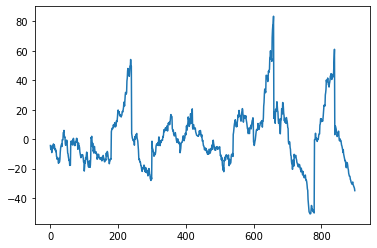

0it [00:00, ?it/s]            time         code  open  close  high   low       volume  \
115   2010-05-05  000001.XSHE  6.45   6.39  6.49  6.22  202550411.0   
411   2010-05-06  000001.XSHE  6.32   5.91  6.32  5.88  213566419.0   
707   2010-05-07  000001.XSHE  5.79   5.86  5.96  5.76  128483034.0   
1003  2010-05-10  000001.XSHE  5.89   5.92  6.00  5.84  120335482.0   
1299  2010-05-11  000001.XSHE  6.06   5.61  6.07  5.61  174926191.0   

          value  close_return  value_return  correlation     shift      kappa  \
115   1022.7022     -0.004673      0.004461     1.248675  0.000313  16.621645   
411    977.1462     -0.075117     -0.044545     1.248675  0.000313  16.621645   
707    958.4036     -0.008460     -0.019181     1.248675  0.000313  16.621645   
1003   966.7477      0.010239      0.008706     1.248675  0.000313  16.621645   
1299   948.9042     -0.052365     -0.018457     1.248675  0.000313  16.621645   

             m     sigma  sigma_eq  portfolio  signal  
115   0.0210

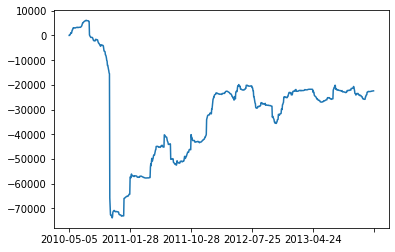

In [2]:
if __name__=='__main__':
    # 读取数据集，构建对应的指数
    dataset = Dataset(data_path='daily_jq_fq', index_list='HS300.csv')
    dataset._load_data_all()
    dataset._compose_index_daily()

    # 构建投资组合
    # portfolio = RandomPortfolio(dataset)
    # portfolio.random_modify_weight(n_stocks=10, max_modify_portion=1.0, fix=True)
    # portfolio.build_portfolio()

    # PCA方法
    portfolio = PCAPortfolio(dataset)
    portfolio.set_parameters()
    portfolio.build_portfolio()
    portfolio.generate_signals()

    # 进行交易回测0
    trader = Trade(portfolio.portfolio_value)
    trader.set_parameters(tax_fee=0.000)
    res = trader.backtest()
    
    x_major_locator =  MultipleLocator(res.shape[0] // 5)
    ax=plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    plt.plot(res.profit)
    plt.show()